In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import cholesky

In [22]:
np.random.uniform(-1, 1)

0.5120131201430629

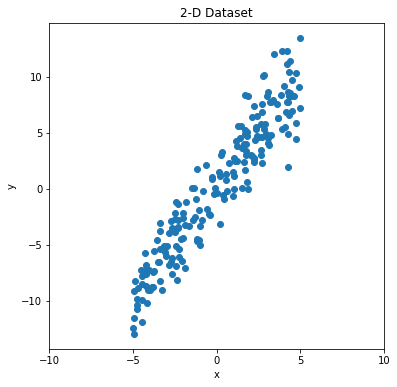

In [23]:
def generate_2d_data(low, high, size):
    x = np.random.uniform(low, high, size)
    y = 2 * x + np.random.normal(0, 2, size)
    return np.column_stack((x, y))

data = generate_2d_data(-5, 5, 200)

plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:, 1], )
plt.title('2-D Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([-10, -5, 0, 5, 10])
plt.yticks([-10, -5, 0, 5, 10])
plt.savefig('2d_data.png', dpi=600);

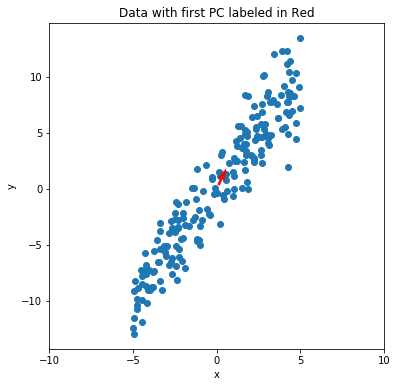

In [24]:
U, S, Vt = np.linalg.svd(data - np.mean(data, axis = 0))

pc1 = Vt[:1][0]

pc_x = np.linspace(-5, 5, 1000)
pc_y = pc_x * pc1[1] / pc1[0]

plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:, 1], )
plt.quiver(np.mean(data, axis=0)[0], np.mean(data, axis = 0)[1], Vt[:1][0][0], Vt[:1][0][1], color='red')
plt.title('Data with first PC labeled in Red')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([-10, -5, 0, 5, 10])
plt.yticks([-10, -5, 0, 5, 10])
plt.savefig('2d_data_pc1.png', dpi=600);

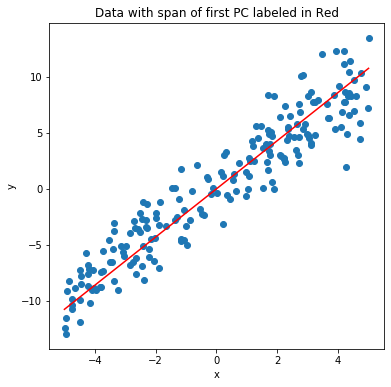

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:, 1], )
plt.plot(pc_x, pc_y, color='red')
plt.title('Data with span of first PC labeled in Red')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('2d_data_span.png', dpi=600);

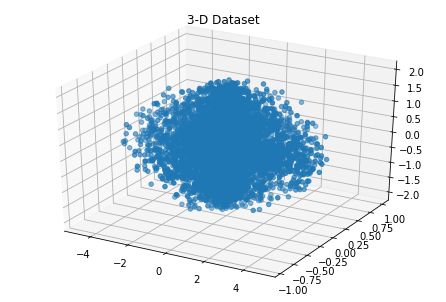

In [26]:
def generate_3d_ellipsoid(low, high, size):
    theta = np.random.uniform(-np.pi, np.pi, size)
    phi = np.random.uniform(-2 * np.pi, 2 * np.pi, size)
    
    rx = np.random.uniform(0, 5, size)
    ry = np.random.uniform(0, 1, size)
    rz = np.random.uniform(0, 2, size)
    
    x = rx * np.cos(theta) * np.cos(phi)
    y = ry * np.cos(theta) * np.sin(phi)
    z = rz * np.sin(theta)
    
    return np.column_stack((x,y,z))

data = generate_3d_ellipsoid(-5, 5, 5000)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2]);

U, S, Vt = np.linalg.svd(data - np.mean(data, axis = 0))

pc1, pc2 = Vt[:1][0], Vt[1:2][0]

r = np.linspace(-1, 1, 100)

x,y,z = [], [] ,[]

for i in range(100):
    x.append(r[i] * pc1[0])
    y.append(r[i] * pc1[1])
    z.append(r[i] * pc1[2])
    
ax.plot(x, y, z, color='red')
plt.title('3-D Dataset')
plt.savefig('3d_data.png', dpi=600);

array([[-3.27549434, -0.0614804 ],
       [ 0.12442229,  1.85405045],
       [-0.45919663, -0.43713934],
       ...,
       [ 0.94659522,  0.21185196],
       [-1.53580444,  0.91006205],
       [-0.53411268, -1.50607688]])

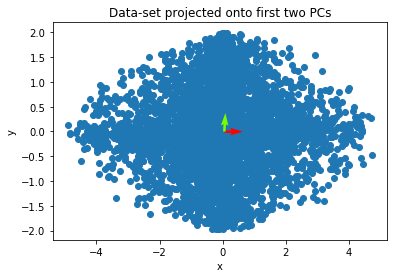

In [36]:
pc1, pc2 = Vt[:1][0], Vt[1:2][0]

pcs = np.column_stack((pc1, pc2))

mu_1, mu_2, mu_3 = np.mean(data, axis = 0)

projected_data = data.dot(pcs)

display(projected_data)

plt.scatter(projected_data[:,0], projected_data[:,1])

plt.quiver(mu_1, mu_2, mu_1 - pc1[0], mu_2 - pc1[1], color = 'red')

plt.quiver(mu_1, mu_2, mu_1 + pc2[1], mu_2 - pc2[2], color = 'lawngreen')

plt.title('Data-set projected onto first two PCs')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('3d_data_proj.png', dpi=600);

In [7]:
data = np.array([[1,2],[3,4],[5,6]])

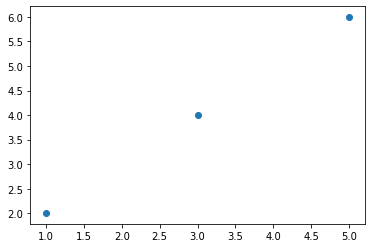

In [8]:
plt.scatter(data[:,0], data[:,1])

In [9]:
U, S, Vt = np.linalg.svd(data - np.mean(data, axis = 0))

In [22]:
data_demeaned = data - np.mean(data, axis = 0)
CV = data_demeaned.T.dot(data_demeaned)

In [23]:
np.linalg.eig(CV)

(array([1.60000000e+01, 1.77635684e-15]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

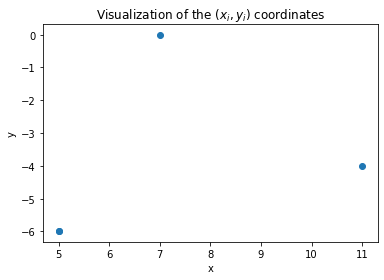

In [51]:
A = np.array([[5, -6], [7, 0], [11, -4], [5, -6]])

U, S, Vt = np.linalg.svd(A - np.mean(A, axis = 0))

plt.scatter(A[:,0], A[:,1])
plt.title('Visualization of the $(x_{i}, y_{i})$ coordinates')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('mech_pca.png', dpi=600)

array([[0.70710678, 0.70710678]])

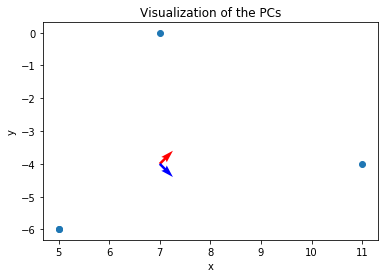

In [48]:
U, S, Vt = np.linalg.svd(A - np.mean(A, axis = 0))
display(Vt[:1])
plt.scatter(A[:,0], A[:,1])
plt.quiver(7, -4, Vt[:1][0][0], Vt[:1][0][1], color='red')
plt.quiver(7, -4, Vt[1:2][0][0], Vt[1:2][0][1], color='blue')
plt.title('Visualization of the PCs')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('mech_pca_pc1.png', dpi=600);